## Introducción a scikit-learn

Scikit-learn (http://scikit-learn.org/stable/) es una librería construida a partir de Numpy, Matplotlib y Scipy que implementa la mayoría de algoritmos de aprendizaje automático.

  * Guía de usuario: http://scikit-learn.org/stable/user_guide.html
  * Referencia API: https://scikit-learn.org/stable/modules/classes.html

Dentro de scikit-learn existen varios módulos principales que vamos a resumir en dos grupos:

  1. Preproceso, evaluación y utilidades:
    * `sklearn.datasets`: utilidades para cargar conjuntos de datos de formatos comunes y distintas webs populares
    preprocessing
    * `sklearn.feature_selection`: algoritmos de selección de variables
    * `sklearn.feature_extraction`: extraer variables de imágenes y texto
    * `sklearn.impute`: estrategias para imputar valores que faltan
    * `sklearn.metrics`: métricas para evaluar modelos
    * `sklearn.model_selection`: estrategias para evaluar el rendimiento de los modelos y selección de hyper-parámetros 
    

  2. Modelos
    * `sklearn.linear_model`: modelos lineales, por ejemplo regresión lineal o regresión logística
    * `sklearn.neighbours`: vecinos próximos (KNN)
    * `sklearn.neural_network`: redes neuronales no profundas
    * `sklearn.ensemble`: modelos de emsemble, por ejemplo *random forest* o *gradient boosting*
    * `sklearn.svm`: máquinas de vectores de soporte, tanto para regresión como para clasificación
    * `sklearn.tree`: árboles de decisión

### Carga de datos

In [1]:
from sklearn.datasets import fetch_openml
blood = fetch_openml('blood-transfusion-service-center')
print(blood.DESCR)

**Author**: Prof. I-Cheng Yeh  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)  
**Please cite**: Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence", Expert Systems with Applications, 2008.   

**Blood Transfusion Service Center Data Set**  
Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem.

To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build an FRMTC model, we selected 748 donors at random from the donor database. 

### Attribute Information  
* V1: Recency - months since last donation
* V2: Frequency - total number of donation
* V3: Monetary - total bl

<img src=https://amueller.github.io/ml-workshop-1-of-4/slides/images/matrix-representation.png width=600>

[](https://amueller.github.io/ml-workshop-1-of-4/slides/images/matrix-representation.png)

In [2]:
blood.data

array([[2.00e+00, 5.00e+01, 1.25e+04, 9.80e+01],
       [0.00e+00, 1.30e+01, 3.25e+03, 2.80e+01],
       [1.00e+00, 1.60e+01, 4.00e+03, 3.50e+01],
       ...,
       [2.30e+01, 3.00e+00, 7.50e+02, 6.20e+01],
       [3.90e+01, 1.00e+00, 2.50e+02, 3.90e+01],
       [7.20e+01, 1.00e+00, 2.50e+02, 7.20e+01]])

In [3]:
blood.data.shape

(748, 4)

In [4]:
blood.target

array(['2', '2', '2', '2', '1', '1', '2', '1', '2', '2', '1', '1', '2',
       '1', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '1', '1',
       '1', '2', '2', '1', '1', '2', '2', '2', '1', '2', '2', '2', '2',
       '2', '2', '1', '2', '1', '2', '2', '1', '1', '1', '1', '1', '2',
       '1', '1', '2', '2', '2', '2', '1', '1', '1', '2', '1', '2', '2',
       '1', '2', '1', '1', '1', '1', '1', '2', '1', '2', '2', '2', '1',
       '1', '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '2', '2',
       '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '1', '1',
       '1', '1', '1', '1', '1', '1', '2', '1', '1', '2', '1', '1', '2',
       '1', '1', '2', '2', '2', '2', '2', '1', '1', '2', '1', '2', '2',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '2', '2', '1', '1', '2', '1', '2', '1', '1', '2', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '1', '2

In [5]:
blood.target.shape

(748,)

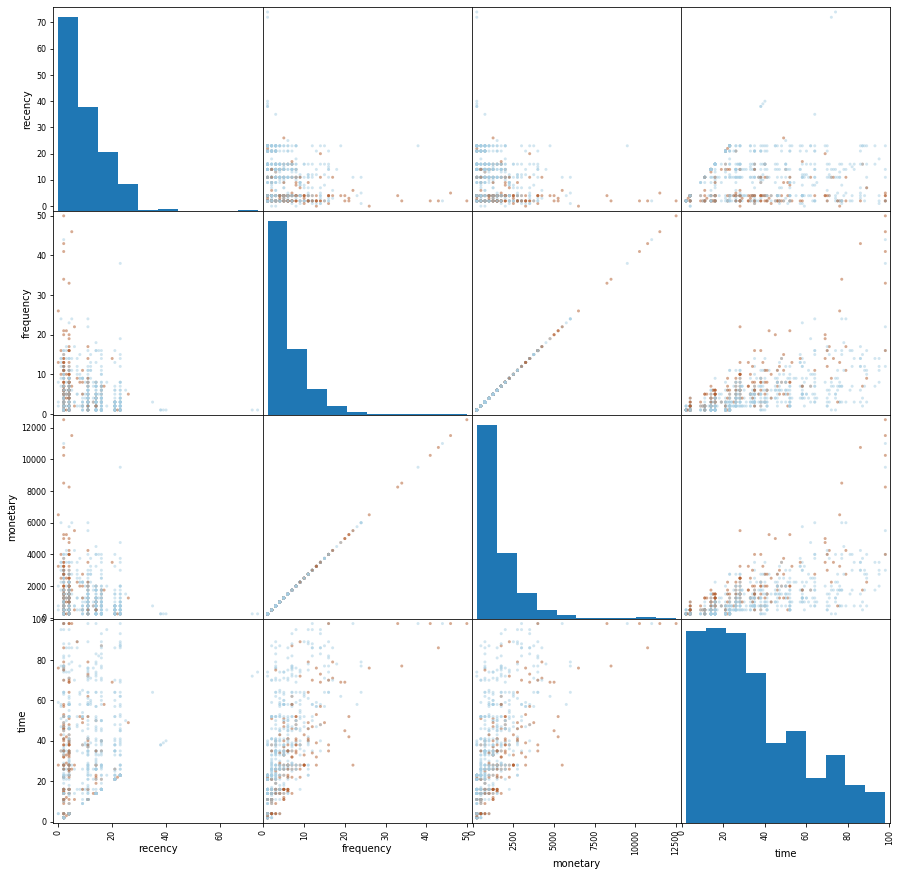

In [6]:
import pandas as pd
X = pd.DataFrame(blood.data, columns=['recency', 'frequency', 'monetary', 'time'])
y = blood.target == '2'
pd.plotting.scatter_matrix(X, c=y, cmap='Paired', figsize=(15, 15));

### Dividir en entrenamiento-test

<img src=https://amueller.github.io/ml-workshop-1-of-4/slides/images/train-test-split.png width=600>

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(blood.data, blood.target)

In [8]:
X_train.shape

(561, 4)

In [9]:
X_test.shape

(187, 4)

In [10]:
y_train.shape

(561,)

In [11]:
y_test.shape

(187,)

### Ejercicios

#### Ejercicio 1

Carga el conjunto de datos `iris` del módulo `sklearn.datasets` usando la función `load_iris`:

   1. Cual es el número de clases, características, y observaciones?
   
   2. Ver información contenida en el atributo `DESCR`
   
   3. Dividir los datos en entrenamiento y test

#### Ejercicio 2

Si cargamos un conjunto de datos propio, generalmente los datos no están en ese formato. Cargar el fichero `iris.csv` de la carpeta `/data` en Python usando `pd.read_csv`:

   1. Realizar gráficos de dispersión emparejados (opcional: ahora usando la función `sns.pairplot`, librería `seaborn`)

   2. Separar las variables de la etiqueta (columna `variety`)

In [12]:
import pandas as pd

iris = pd.read_csv('../../data/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
y = iris['variety']
X = iris.drop(columns='variety')

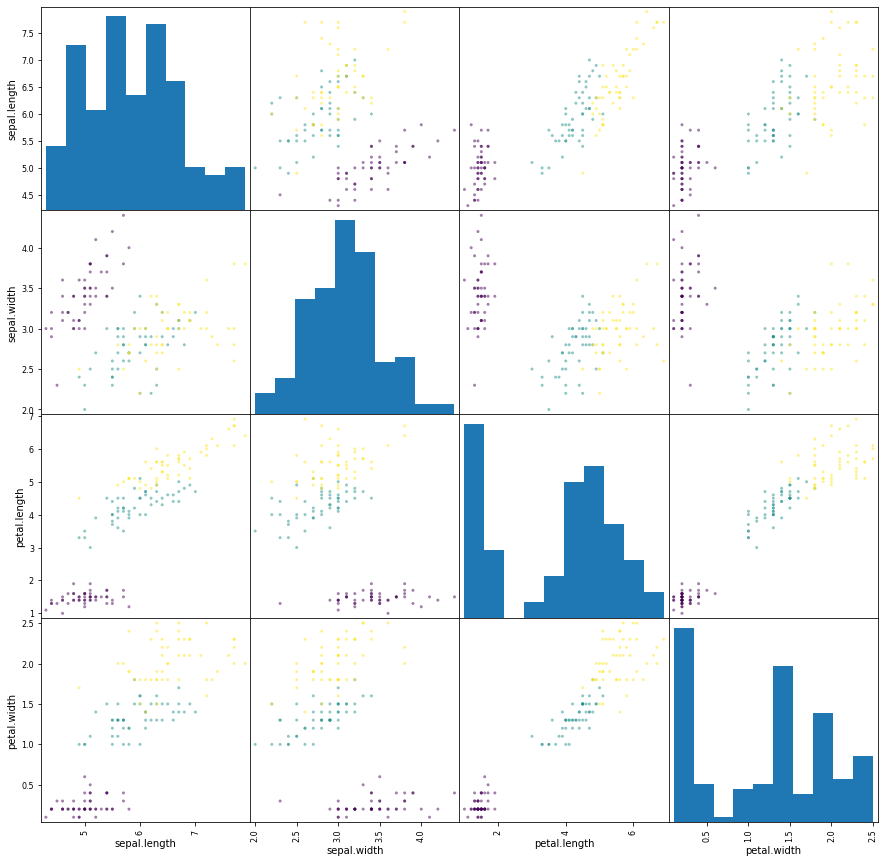

In [14]:
d = {'Setosa': 1, 'Versicolor': 2, 'Virginica': 3}
pd.plotting.scatter_matrix(X, c=y.map(d), cmap='viridis', figsize=(15, 15));

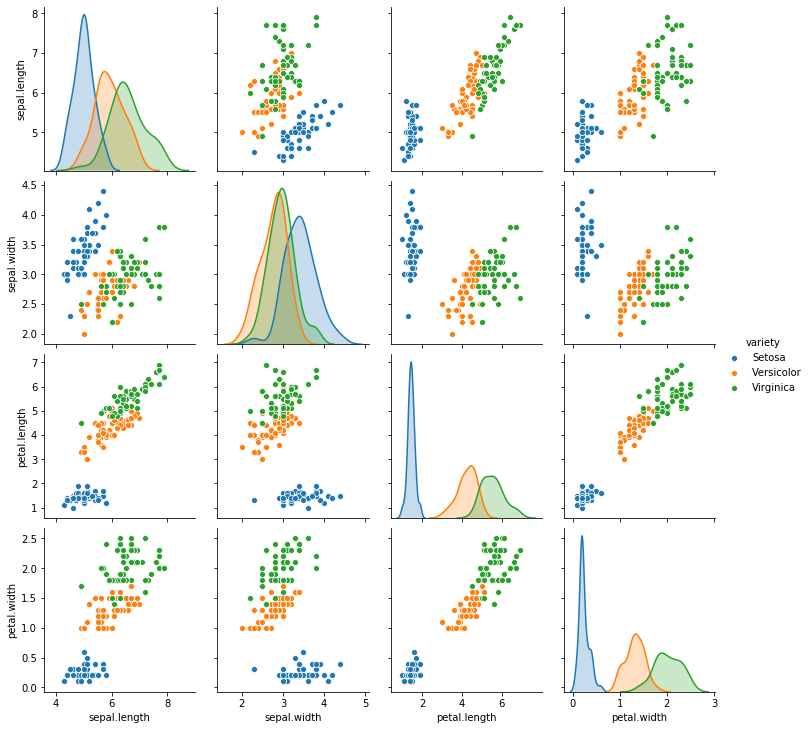

In [15]:
import seaborn as sns

sns.pairplot(data=iris, hue='variety');